# Loading Dataset

In [17]:
import pandas as pd

features_names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv("data/breast-cancer-wisconsin.data.csv", names=features_names)
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Data Preprocessing

In [18]:
df.replace('?', -99999, inplace=True)
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [19]:
df.drop(['id'], axis=1, inplace=True)

In [20]:
# Check Data Shape
print(df.shape)

(699, 10)


# Description of dataset

In [21]:
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   clump_thickness         699 non-null    int64 
 1   uniform_cell_size       699 non-null    int64 
 2   uniform_cell_shape      699 non-null    int64 
 3   marginal_adhesion       699 non-null    int64 
 4   single_epithelial_size  699 non-null    int64 
 5   bare_nuclei             699 non-null    object
 6   bland_chromatin         699 non-null    int64 
 7   normal_nucleoli         699 non-null    int64 
 8   mitoses                 699 non-null    int64 
 9   class                   699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None


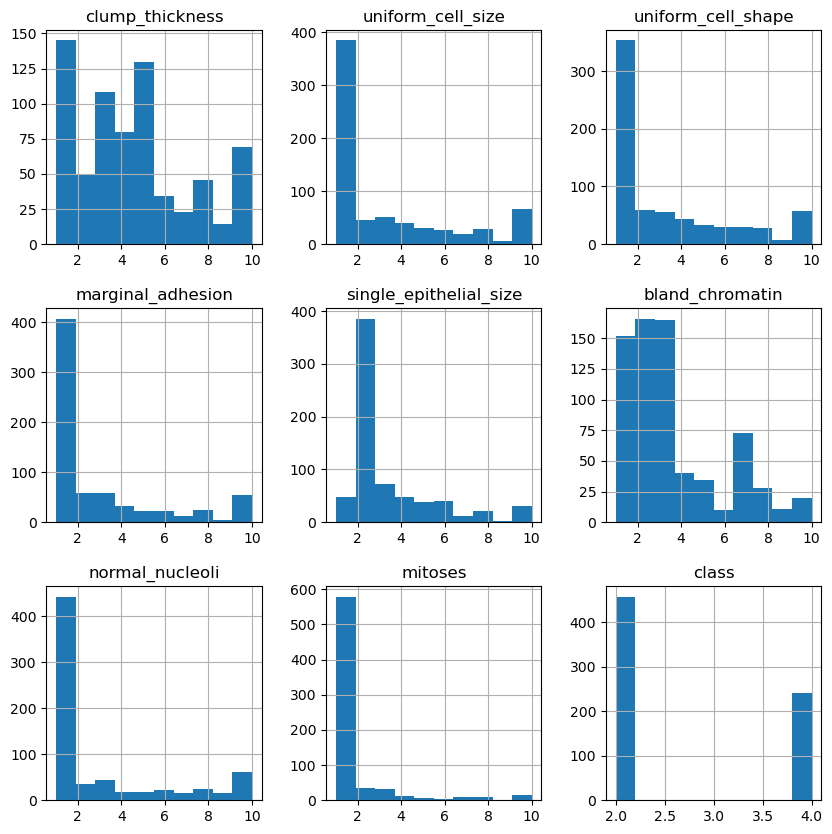

In [23]:
import matplotlib.pyplot as plt

# Histogram of features
df.hist(figsize = (10, 10))
plt.show()

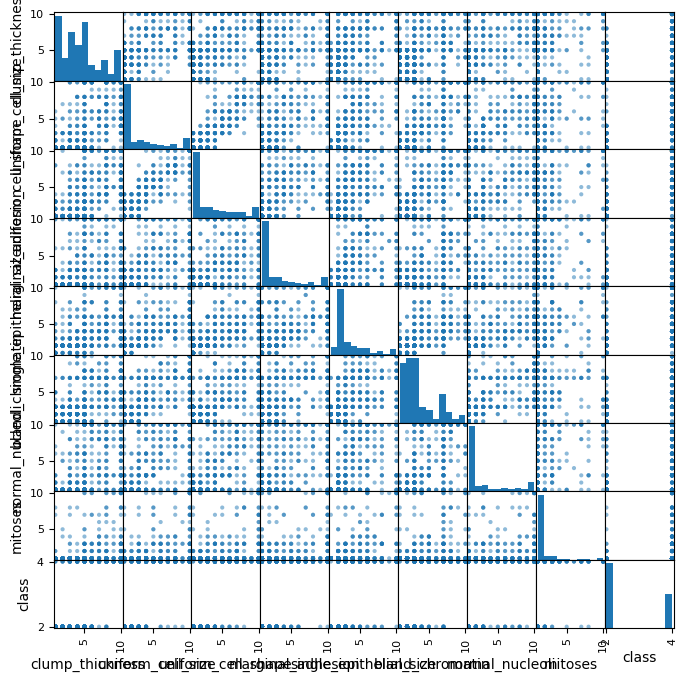

In [34]:
from pandas.plotting import scatter_matrix

# Scatter matrix for correlation
scatter_matrix(df, figsize = (8,8))
plt.show()

# Seperation of dataset

In [25]:
from sklearn import model_selection
import numpy as np

# feature, target seperation
X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# parameter setup 
seed = 8
scoring = 'accuracy'

# Model Training

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Model Definition
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC(gamma="auto", random_state=seed)))

# Model Evaluation 
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.969578 (0.017967)
SVM: 0.957078 (0.021408)


# Evaluation of Model

In [27]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluation of Models Using Test set
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        94
           4       0.96      0.96      0.96        46

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM
0.9357142857142857
              precision    recall  f1-score   support

           2       0.99      0.91      0.95        94
           4       0.85      0.98      0.91        46

    accuracy                           0.94       140
   macro avg       0.92      0.95      0.93       140
weighted avg       0.94      0.94      0.94       140

